# House Prices - Advanced Regression Techniques

## Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Read Dataset

In [2]:
path = '../datasets/house-prices-advanced-regression-techniques/'

In [3]:
train_df = pd.read_csv(path + 'train.csv')
test_df = pd.read_csv(path + 'test.csv')

# Understand dataset

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
if 'SalePrice' not in test_df.columns:
  test_df['SalePrice'] = 0

In [7]:
df = pd.concat([train_df, test_df], axis = 0)
df = df.set_index('Id')

In [8]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Clean Data Frame

In [9]:
df_null  = df[df.isnull().sum()[df.isnull().sum()>0].index]

In [10]:
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


<Axes: ylabel='Id'>

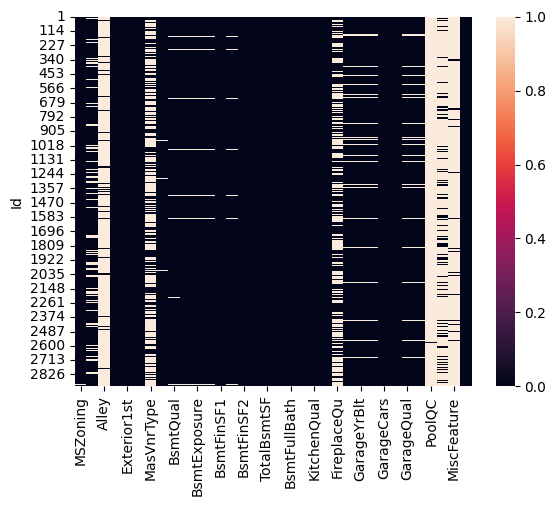

In [11]:
sns.heatmap(df_null.isnull())

In [12]:
df_objects =  df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

In [13]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)
df_objects = df_objects.fillna('null')
df_objects_encoded = pd.get_dummies(df_objects)

In [14]:
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i, axis = 1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [15]:
new_df = pd.concat([df, df_objects_encoded], axis = 1)

In [16]:
len(new_df.columns)

304

In [17]:
len(df.columns), len(df_objects_encoded.columns)

(74, 230)

In [18]:
new_df = new_df.drop(df.select_dtypes(include=['object']), axis = 1)

new_df.isna().sum()[new_df.isna().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [19]:
Mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'GarageArea']

for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0]

Series([], dtype: int64)

In [20]:
training_data = new_df[0:len(train_df)]
testing_data = new_df[len(train_df):]
testing_data = testing_data.drop(columns='SalePrice')

## split data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
Y_train = np.reshape(Y_train,(-1, 1))
Y_test = np.reshape(Y_test,(-1, 1))
X_train.shape, Y_train.shape

((1168, 266), (1168, 1))

# Training models

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [24]:
model_info = {}

In [25]:
model_1 = LinearRegression()
model_1.fit(X, y)
y_pred = model_1.predict(X_test)
model_info["LinearRegression"] = mean_squared_error(Y_test, y_pred)
model_info

{'LinearRegression': 260222920.54688713}

In [26]:
from xgboost import XGBRegressor

In [27]:
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
model_2.fit(X, y)
y_pred = model_2.predict(X_test)
model_info["XGBRegressor"] = mean_squared_error(Y_test, y_pred)
model_info

{'LinearRegression': 260222920.54688713, 'XGBRegressor': 6301.4996362451}

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
model_3 = RandomForestRegressor(n_estimators=1000)
model_3.fit(X, y)
y_pred = model_3.predict(X_test)
model_info["RandomForestRegressor"] = mean_squared_error(Y_test, y_pred)
model_info

{'LinearRegression': 260222920.54688713,
 'XGBRegressor': 6301.4996362451,
 'RandomForestRegressor': 71983596.7265825}

In [30]:
import lightgbm as lgb

In [31]:
model_4 = lgb.LGBMRegressor(
    objective='regression',
    metric='rmse',
    boosting_type='gbdt',
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31
)

model_4.fit(X, y)
y_pred = model_3.predict(X_test)
model_info["LGBMRegressor"] = mean_squared_error(Y_test, y_pred)
model_info

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3437
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 175
[LightGBM] [Info] Start training from score 180921.195890


{'LinearRegression': 260222920.54688713,
 'XGBRegressor': 6301.4996362451,
 'RandomForestRegressor': 71983596.7265825,
 'LGBMRegressor': 71983596.7265825}

In [32]:
from catboost import CatBoostRegressor

In [33]:
model_5 = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    early_stopping_rounds=100,
    verbose=100
)

model_5.fit(X, y)
y_pred = model_5.predict(X_test)
model_info["CatBoostRegressor"] = mean_squared_error(Y_test, y_pred)
model_info

0:	learn: 76783.9633881	total: 52.7ms	remaining: 52.7s
100:	learn: 20490.4729417	total: 221ms	remaining: 1.97s
200:	learn: 16128.2671998	total: 481ms	remaining: 1.91s
300:	learn: 13516.4571353	total: 641ms	remaining: 1.49s
400:	learn: 11645.5467542	total: 797ms	remaining: 1.19s
500:	learn: 10239.4799506	total: 951ms	remaining: 948ms
600:	learn: 9034.6047287	total: 1.13s	remaining: 748ms
700:	learn: 8034.1506829	total: 1.32s	remaining: 561ms
800:	learn: 7212.8753866	total: 1.53s	remaining: 380ms
900:	learn: 6519.8902728	total: 1.7s	remaining: 186ms
999:	learn: 5813.9734862	total: 1.86s	remaining: 0us


{'LinearRegression': 260222920.54688713,
 'XGBRegressor': 6301.4996362451,
 'RandomForestRegressor': 71983596.7265825,
 'LGBMRegressor': 71983596.7265825,
 'CatBoostRegressor': 33598599.379294954}

In [34]:
min(model_info, key=model_info.get)

'XGBRegressor'

## tuning

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 3000, step=500),
        'max_depth': trial.suggest_int('max_depth', 3, 13),
        'learning_rate': trial.suggest_float('learning_rate', 1e-6, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1.0),
        'objective': 'reg:squarederror',
        'random_state': 42,
        'verbosity': 0,
    }

    model = XGBRegressor(**params)
    score = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    return -1 * np.mean(score)  # minimize RMSE

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # ⬅️ Try 50 trials

/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-05-29 16:20:34,735] A new study created in memory with name: no-name-4e06478c-c9bb-42a1-8c65-0521839a7b2b
[I 2025-05-29 16:20:55,542] Trial 0 finished with value: 79160.13942651359 and parameters: {'n_estimators': 500, 'max_depth': 9, 'learning_rate': 4.4282240301776435e-06, 'subsample': 0.7246406620072101, 'colsample_bytree': 0.3022779877425631}. Best is trial 0 with value: 79160.13942651359.
[I 2025-05-29 16:21:25,206] Trial 1 finished with value: 40407.788199103794 and parameters: {'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.0007348534170982781, 'subsample': 0.15841518491557646, 'colsample_bytree': 0.36682978207769834}. Best is trial 1 with value: 40407.788199103794.
[I 2025-05-29 16:23:12,033] Tria

In [37]:
print("Best Parameters from Optuna:", study.best_params)
print("Best RMSE from Optuna:", study.best_value)

Best Parameters from Optuna: {'n_estimators': 1500, 'max_depth': 3, 'learning_rate': 0.09782782560750312, 'subsample': 0.6143491217365231, 'colsample_bytree': 0.7970633860213997}
Best RMSE from Optuna: 24975.64579700785


In [38]:
final_model = XGBRegressor(**study.best_params, random_state=42)
final_model.fit(X, y)
y_pred = final_model.predict(X_test)


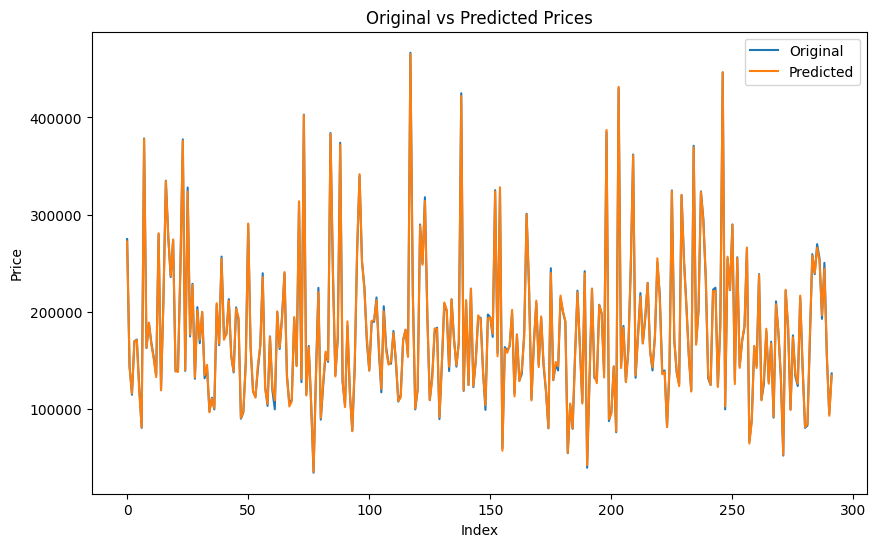

In [39]:
sort_indices = np.argsort(Y_test)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(Y_test)), Y_test, label='Original')
plt.plot(np.arange(len(Y_test)), y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predicted Prices')
plt.legend()
plt.show()

In [40]:
pred = final_model.predict(testing_data)

final = pd.DataFrame()
final['Id'] = testing_data.index
final['SalePrice'] = pred

# Write DataFrame to a CSV file without index
final.to_csv('output.csv', index=False)